# AI28 - Machine Learning 
GLANDIER Quentin \
CHEMANACK Thierry \
GI04

## <center>TP N° 1 - Partie 4</center>
## <center>Pandas</center>
<br>
<br>

### **1 - Structure DataFrame**


 ---  3. Charger les données du fichier titanic3.xls 

Type de data: <class 'pandas.core.frame.DataFrame'>

 ---  4. Créer une nouvelle variable df_titanic, une copie de data 


 ---  5. Dimensions de df_titanic 

Dimensions de df_titanic: (1309, 14)

 ---  6. Noms des colonnes de df_titanic 

Noms des colonnes de df_titanic: ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
Type de df_titanic.columns: <class 'pandas.core.indexes.base.Index'>
Valeurs des colonnes:
 [[1 1 'Allen, Miss. Elisabeth Walton' ... 2 nan 'St Louis, MO']
 [1 1 'Allison, Master. Hudson Trevor' ... '11' nan
  'Montreal, PQ / Chesterville, ON']
 [1 0 'Allison, Miss. Helen Loraine' ... nan nan
  'Montreal, PQ / Chesterville, ON']
 ...
 [3 0 'Zakarian, Mr. Mapriededer' ... nan 304.0 nan]
 [3 0 'Zakarian, Mr. Ortin' ... nan nan nan]
 [3 0 'Zimmerman, Mr. Leo' ... nan nan nan]]

 ---  7. Types de données du dataset 

Types de données du d

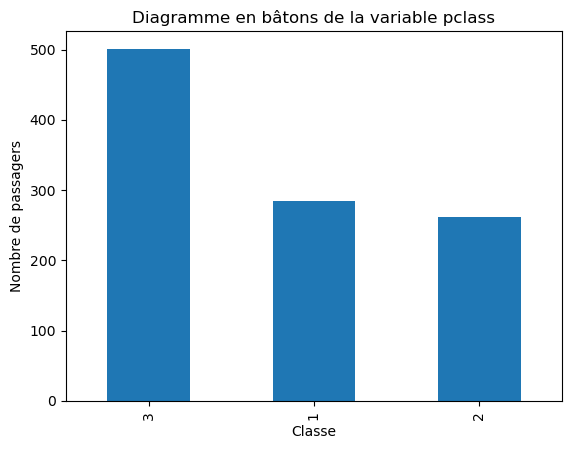


 ---  18. Tracer l'histogramme de la variable 'age' 



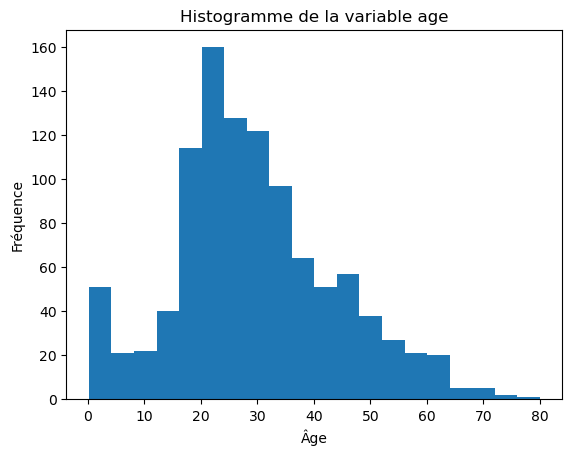


 ---  19. Regrouper les exemples selon la variable 'sex' 



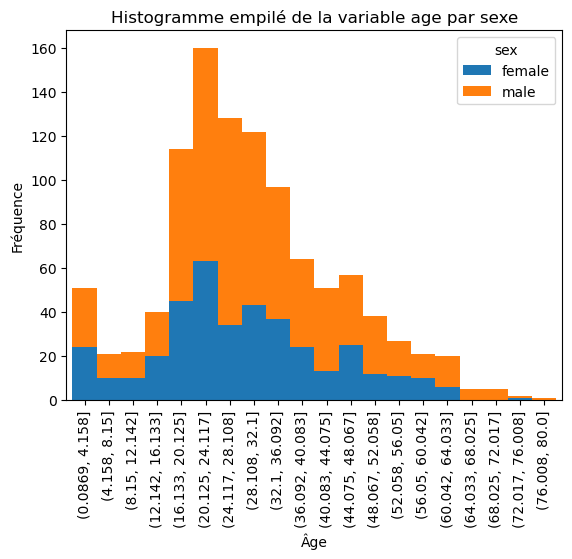

In [1]:
# 1. Téléchargement du fichier titanic3.xls

# 2. Importer les librairies Numpy, Matplotlib, Scipy, et Pandas. Associer l’alias pd à Pandas.
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def p(x):
    print("\n --- ", x, "\n")

p("3. Charger les données du fichier titanic3.xls")
data = pd.read_excel("data/titanic3.xls")
print("Type de data:", type(data))

p("4. Créer une nouvelle variable df_titanic, une copie de data")
df_titanic = data.copy()

p("5. Dimensions de df_titanic")
print("Dimensions de df_titanic:", df_titanic.shape)

p("6. Noms des colonnes de df_titanic")
print("Noms des colonnes de df_titanic:", df_titanic.columns.tolist())
print("Type de df_titanic.columns:", type(df_titanic.columns))
print("Valeurs des colonnes:\n", df_titanic.values)

p("7. Types de données du dataset")
print("Types de données du dataset:")
print(df_titanic.dtypes)

p("8. Afficher les 5 premières et dernières lignes de df_titanic")
print("Les 5 premières lignes de df_titanic:")
print(df_titanic.head())
print("\nLes 5 dernières lignes de df_titanic:")
print(df_titanic.tail())

p("9. Informations sur chaque variable du dataset")
print("Informations sur chaque variable du dataset:")
print(df_titanic.info())

p("10. Calculer le pourcentage des valeurs manquantes de la variable 'cabin'")
missing_percentage = df_titanic['cabin'].isnull().mean() * 100
print("Pourcentage des valeurs manquantes de la variable 'cabin':", missing_percentage)

p("11. Supprimer la variable 'cabin' du df_titanic")
df_titanic.drop(columns=['cabin'], inplace=True)

p("12. Déterminer les valeurs uniques de la colonne 'embarked' et compter le nombre de chacune de ses modalités")
print("Valeurs uniques de 'embarked':", df_titanic['embarked'].unique())
print("Nombre de chaque modalité de 'embarked':")
print(df_titanic['embarked'].value_counts())

p("13. Supprimer les variables spécifiées du df_titanic")
df_titanic.drop(columns=['name', 'ticket', 'fare', 'sibsp', 'embarked', 'boat', 'body', 'home.dest'], inplace=True)
print("Les 5 premières lignes de df_titanic après suppression des variables:")
print(df_titanic.head())

p("14. Calculer les statistiques de base des variables de df_titanic")
print("Statistiques de base des variables de df_titanic:")
print(df_titanic.describe())

p("15. Supprimer les lignes contenant des valeurs manquantes")
df_titanic.dropna(inplace=True)

p("16. Compter le nombre de chaque modalité de 'pclass'")
print("Nombre de chaque modalité de 'pclass':")
print(df_titanic['pclass'].value_counts())

p("17. Tracer un diagramme en bâtons de 'pclass'")
df_titanic['pclass'].value_counts().plot.bar()
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.title('Diagramme en bâtons de la variable pclass')
plt.show()

p("18. Tracer l'histogramme de la variable 'age'")
df_titanic['age'].plot.hist(bins=20)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Histogramme de la variable age')
plt.show()

p("19. Regrouper les exemples selon la variable 'sex'")
# Regrouper les données par sexe et âge
grouped_by_age_sex = df_titanic.groupby([pd.cut(df_titanic['age'], bins=20), 'sex'], observed=True)

# Tracer un histogramme empilé pour chaque groupe
grouped_by_age_sex.size().unstack().plot(kind='bar', stacked=True, width=1.0)

# Ajouter des labels et un titre
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Histogramme empilé de la variable age par sexe')

# Afficher le diagramme
plt.show()




### **2 - Structure Series**

In [10]:
df_titanic = data.copy()
df_titanic.drop(columns=['ticket', 'fare', 'sibsp', 'embarked', 'boat', 'body', 'home.dest', 'cabin', 'parch', 'survived'], inplace=True)
df_titanic.dropna(inplace=True)

# 1. Déclarer la variable serie et l’affecter à la colonne age de df_titanic. Afficher serie.
serie = df_titanic['age']
print("Série 'age':")
print(serie)

# 2. Indexer df_titanic avec les noms des passagers. Utiliser le module set_index et la colonne name du dataframe data.
df_titanic_indexed = df_titanic.set_index('name')
print("\nDataFrame indexé par les noms des passagers:")
print(df_titanic_indexed)

# 3. Afficher le nom de chaque passager ainsi que son âge.
print("\nNoms des passagers et leurs âges:")
print(df_titanic_indexed['age'])


Série 'age':
0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

DataFrame indexé par les noms des passagers:
                                                 pclass     sex      age
name                                                                    
Allen, Miss. Elisabeth Walton                         1  female  29.0000
Allison, Master. Hudson Trevor                        1    male   0.9167
Allison, Miss. Helen Loraine                          1  female   2.0000
Allison, Mr. Hudson Joshua Creighton                  1    male  30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)       1  female  25.0000
...                                                 ...     ...      ...
Youseff, Mr. Gerious                                  3    male  45.5000
Zabour, Miss. Hileni                                  3  female  14.

### **3 - Indexation et slicing**

In [11]:
# 1. Afficher les 10 premières valeurs de la série age (variable age).
print("10 premières valeurs de la série 'age':")
print(df_titanic['age'].head(10))

# 2. Générer un masque pour la variable age, i.e. tester si chaque passager est mineur (age < 18). Sélectionner les passagers mineurs.
mask_minor = df_titanic['age'] < 18
passengers_minor = df_titanic[mask_minor]
print("\nPassagers mineurs:")
print(passengers_minor)

# 3. Regrouper tous les passagers mineurs selon leur sex et pclass.
grouped_minor = passengers_minor.groupby(['sex', 'pclass'])
print("\nRegroupement des passagers mineurs selon leur sexe et pclass:")
print(grouped_minor.size())

# 4. Tester les fonctions iloc (index de localisation) et loc.
print("\nExemple d'utilisation de iloc:")
print(df_titanic.iloc[:4, [df_titanic.columns.get_loc('age'), df_titanic.columns.get_loc('sex')]])
print("\nExemple d'utilisation de loc:")
print(df_titanic.loc[:4, ['age', 'sex']])

# 5. Créer une nouvelle variable modified1_age qui prend les mêmes valeurs de age. Modifier la colonne modified1_age afin de créer 4 catégories.
bins = [0, 18, 35, 55, df_titanic['age'].max()] # catégories d'âges
labels = ['0', '1', '2', '4']
df_titanic['modified1_age'] = pd.cut(df_titanic['age'], bins=bins, labels=labels, include_lowest=True)
print("\nDataFrame avec la nouvelle variable 'modified1_age':")
print(df_titanic[['age', 'modified1_age']])

# 6. Compter le nombre de chacune des nouvelles modalités de la variable age.
print("\nNombre de chacune des nouvelles modalités de la variable 'modified1_age':")
print(df_titanic['modified1_age'].value_counts())


10 premières valeurs de la série 'age':
0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
9    71.0000
Name: age, dtype: float64

Passagers mineurs:
      pclass                                     name     sex      age
1          1           Allison, Master. Hudson Trevor    male   0.9167
2          1             Allison, Miss. Helen Loraine  female   2.0000
53         1                   Carrau, Mr. Jose Pedro    male  17.0000
54         1      Carter, Master. William Thornton II    male  11.0000
55         1                Carter, Miss. Lucile Polk  female  14.0000
...      ...                                      ...     ...      ...
1265       3                Van Impe, Miss. Catharina  female  10.0000
1275       3          Vander Planke, Mr. Leo Edmondus    male  16.0000
1279       3     Vestrom, Miss. Hulda Amanda Adolfina  female  14.0000
1300       3  Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0000
130

### **4 - Fonctions `map`, `apply` et `replace`**

In [12]:
# 1. Créer une nouvelle variable modified2_age qui prend les mêmes valeurs de age et appliquer une fonction lambda pour ajouter 1 à chaque valeur.
df_titanic['modified2_age'] = df_titanic['age'].map(lambda x: x + 1)

# 2. Écrire une fonction categories_age qui renvoie les 4 catégories suivantes selon l’âge: ‘<18ans’, ‘18-35ans’, ‘35-55ans’ et ‘>55ans’.
def categories_age(age):
    if age < 18:
        return '<18ans'
    elif age <= 35:
        return '18-35ans'
    elif age <= 55:
        return '35-55ans'
    else:
        return '>55ans'

# 3. Appliquer la fonction categories_age sur la variable age.
df_titanic['age_categories'] = df_titanic['age'].apply(categories_age)

# 4. Encoder la variable sex avec la fonction replace: male ← 1 et female ← 2.
df_titanic['sex_encoded'] = df_titanic['sex'].replace({'male': 1, 'female': 2})

# Afficher les premières lignes pour vérifier les résultats
print(df_titanic.head())


   pclass                                             name     sex      age  \
0       1                    Allen, Miss. Elisabeth Walton  female  29.0000   
1       1                   Allison, Master. Hudson Trevor    male   0.9167   
2       1                     Allison, Miss. Helen Loraine  female   2.0000   
3       1             Allison, Mr. Hudson Joshua Creighton    male  30.0000   
4       1  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000   

  modified1_age  modified2_age age_categories  sex_encoded  
0             1        30.0000       18-35ans            2  
1             0         1.9167         <18ans            1  
2             0         3.0000         <18ans            2  
3             1        31.0000       18-35ans            1  
4             1        26.0000       18-35ans            2  
